### Data Cleaning

In [2]:
import pandas as pd
ratings = pd.read_csv('Data/ratings.csv')
movies = pd.read_csv('Data/movies.csv')
links = pd.read_csv('Data/links.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.shape

(9742, 3)

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
ratings.shape

(100836, 4)

In [7]:
links.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [8]:
movies_ratings=ratings.join(movies.set_index('movieId'), on='movieId', how='left', lsuffix='r')

In [9]:
movies_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [10]:
movies_ratings.shape

(100836, 6)

In [11]:
movies_ratings.isna().sum().sum()

0

In [12]:
movies_ratings_imdb=movies_ratings.join(links.set_index('movieId'), on='movieId', how='left', lsuffix='r')

In [13]:
movies_ratings_imdb.head()

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,113277,949.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0


In [30]:
movies_ratings_imdb.shape

(100836, 8)

In [16]:
basics = pd.read_csv('Data/title.basics.tsv.gz', compression='gzip', sep='\t')

C:\Users\swzoe\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [18]:
basics.shape

(7557513, 9)

In [26]:
crew = pd.read_csv('Data/title.crew.tsv.gz', compression='gzip', sep='\t')

In [27]:
crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [28]:
crew.shape

(7557513, 3)

In [29]:
basics.rename(columns = {'tconst':'imdbId'}, inplace = True)
crew.rename(columns = {'tconst':'imdbId'}, inplace = True)

In [30]:
basics_crew=basics.join(crew.set_index('imdbId'), on='imdbId', how='inner', lsuffix='b')

In [31]:
basics_crew.head(2)

,imdbId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",nm0005690,\N
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",nm0721526,\N


In [32]:
basics_crew.imdbId=basics_crew.imdbId.map(lambda x: int(x.strip("tt")))

In [68]:
basics_crew.duplicated(subset='imdbId').sum()

0

In [33]:
combined=movies_ratings_imdb.join(basics_crew.set_index('imdbId'), on='imdbId', how='left', lsuffix='b')

In [34]:
combined.head()

,userId,movieId,rating,timestamp,title,genresb,imdbId,tmdbId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,movie,Toy Story,Toy Story,0,1995,\N,81,"Adventure,Animation,Comedy",nm0005124,"nm0005124,nm0230032,nm0004056,nm0710020,nm0923..."
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,movie,Grumpier Old Men,Grumpier Old Men,0,1995,\N,101,"Comedy,Romance",nm0222043,nm0425756
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,113277,949.0,movie,Heat,Heat,0,1995,\N,170,"Crime,Drama,Thriller",nm0000520,nm0000520
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,movie,Se7en,Se7en,0,1995,\N,127,"Crime,Drama,Mystery",nm0000399,nm0001825
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,movie,The Usual Suspects,The Usual Suspects,0,1995,\N,106,"Crime,Mystery,Thriller",nm0001741,nm0003160


In [35]:
combined.shape

(100836, 18)

In [36]:
condensed=combined.drop(columns=['genres','writers','timestamp','imdbId','tmdbId','titleType','primaryTitle','originalTitle','isAdult','endYear'])

In [37]:
condensed.head(2)

,userId,movieId,rating,title,genresb,startYear,runtimeMinutes,directors
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,81,nm0005124
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995,101,nm0222043


In [38]:
condensed.dropna(inplace=True)

In [39]:
for column in condensed.columns:
     print("\n" + column)
     print(condensed[column].value_counts())


userId
414    2695
599    2475
474    2105
448    1861
274    1345
       ... 
595      20
569      20
431      20
442      20
576      19
Name: userId, Length: 610, dtype: int64

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
153386      1
57147       1
5986        1
100304      1
8196        1
Name: movieId, Length: 9707, dtype: int64

rating
4.0    26803
3.0    20035
5.0    13196
3.5    13125
4.5     8546
2.0     7545
2.5     5550
1.0     2809
1.5     1791
0.5     1365
Name: rating, dtype: int64

title
Forrest Gump (1994)                      329
Shawshank Redemption, The (1994)         317
Pulp Fiction (1994)                      307
Silence of the Lambs, The (1991)         279
Matrix, The (1999)                       278
                                        ... 
Are We Done Yet? (2007)                    1
Pawn (2013)                                1
Senseless (1998)                           1
King of Masks, The (Bian Lian) (1996) 

In [40]:
condensed['startYear']=condensed['startYear'].astype(float)

In [41]:
condensed=condensed[condensed['runtimeMinutes']!='\\N']

In [42]:
condensed['runtimeMinutes']=condensed['runtimeMinutes'].astype(float)

In [43]:
condensed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100760 entries, 0 to 100835
Data columns (total 8 columns):
userId            100760 non-null int64
movieId           100760 non-null int64
rating            100760 non-null float64
title             100760 non-null object
genresb           100760 non-null object
startYear         100760 non-null float64
runtimeMinutes    100760 non-null float64
directors         100760 non-null object
dtypes: float64(3), int64(2), object(3)
memory usage: 6.9+ MB


### EDA

In [44]:
eda_df=condensed

In [45]:
genres = set()
for genre_string in eda_df['genresb']:
   genre_list = genre_string.split('|')
   for genre in genre_list:
       genres.add(genre)
genres = list(genres)

In [46]:
for g in genres:
    eda_df[g]=eda_df['genresb'].apply(lambda x: 1 if g in x else 0)
    #Last line converts Trues to 1 and Falses to 0 for the genres.

In [47]:
eda_df.drop('genresb',axis=1,inplace=True)

In [48]:
eda_df.head(2)

,userId,movieId,rating,title,startYear,runtimeMinutes,directors,Thriller,Documentary,IMAX,...,(no genres listed),Children,Adventure,Western,Musical,Fantasy,Comedy,Drama,Horror,Action
0,1,1,4.0,Toy Story (1995),1995.0,81.0,nm0005124,0,0,0,...,0,1,1,0,0,1,1,0,0,0
1,1,3,4.0,Grumpier Old Men (1995),1995.0,101.0,nm0222043,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [75]:
def rating_by_genre(genre, df):
        try:
            return df.groupby(genre).median()["rating"].loc[1]
        except KeyError:
            return None

In [76]:
genre_names = ['Thriller', 'Documentary', 'IMAX', 'Animation', 'Romance',
       'War', 'Film-Noir', 'Crime', 'Mystery', 'Sci-Fi', '(no genres listed)',
       'Children', 'Adventure', 'Western', 'Musical', 'Fantasy', 'Comedy',
       'Drama', 'Horror', 'Action']

In [77]:
median_rating_genre = {}
for genre in genre_names:
    median_rating_genre[genre] = rating_by_genre(genre, eda_df)

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
palette = "YlGnBu"

In [63]:
sns.set_context("poster")

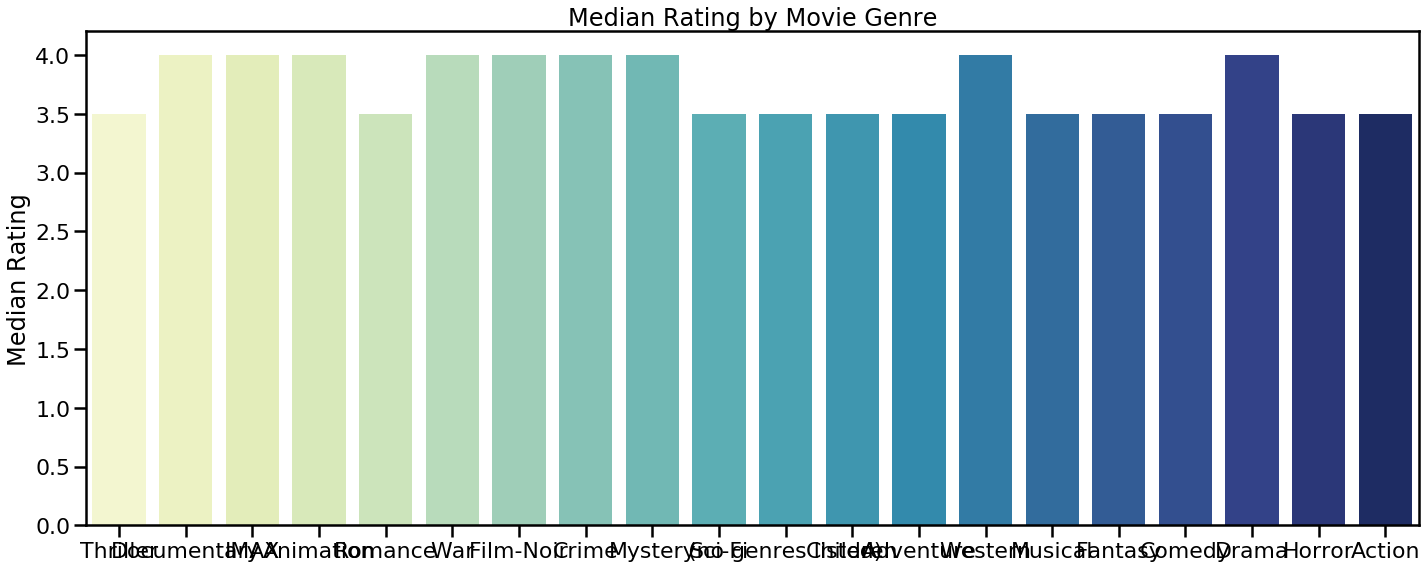

In [79]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
rating_plot = sns.barplot(x = list(median_rating_genre.keys()), y = list(median_rating_genre.values()), palette = palette, ax=ax)
rating_plot.set_title("Median Rating by Movie Genre")
rating_plot.set_ylabel("Median Rating")
plt.tight_layout()
plt.show()

In [99]:
subdf = eda_df.groupby(["rating"]).sum()
subdf.drop(columns = ["userId", "movieId", "startYear", "runtimeMinutes"], inplace=True)

In [ ]:
.legend(loc='center left', bbox_to_anchor=(1, 0.5));

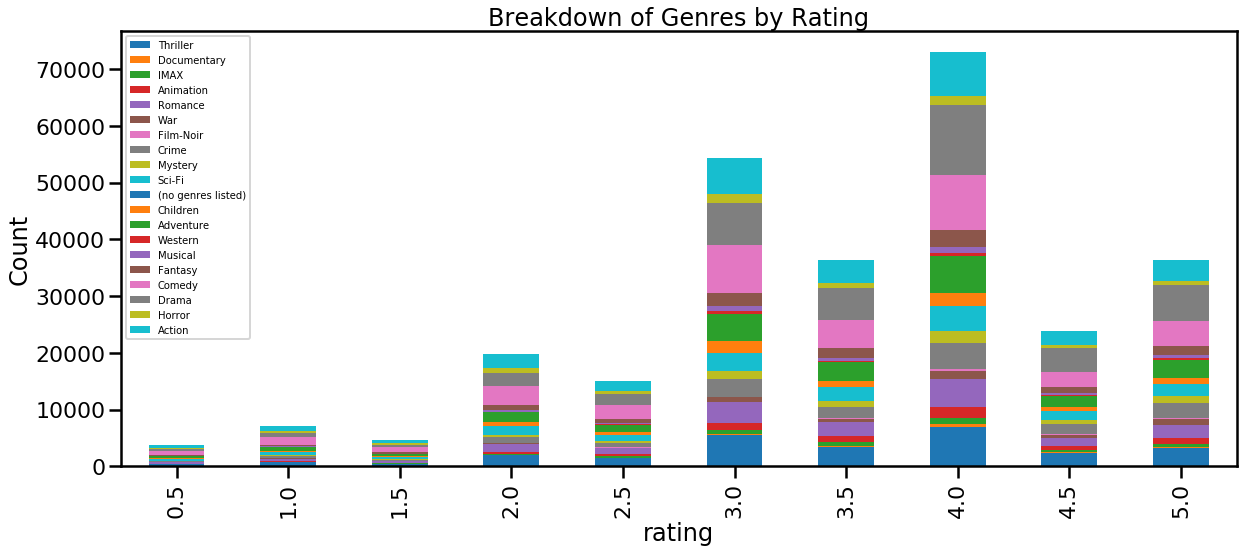

In [130]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
subdf.plot.bar(stacked=True, ax=ax)
plt.legend(loc=2, prop={'size': 10})
plt.ylabel("Count")
plt.title("Breakdown of Genres by Rating")
plt.show()

In [141]:
import numpy as np

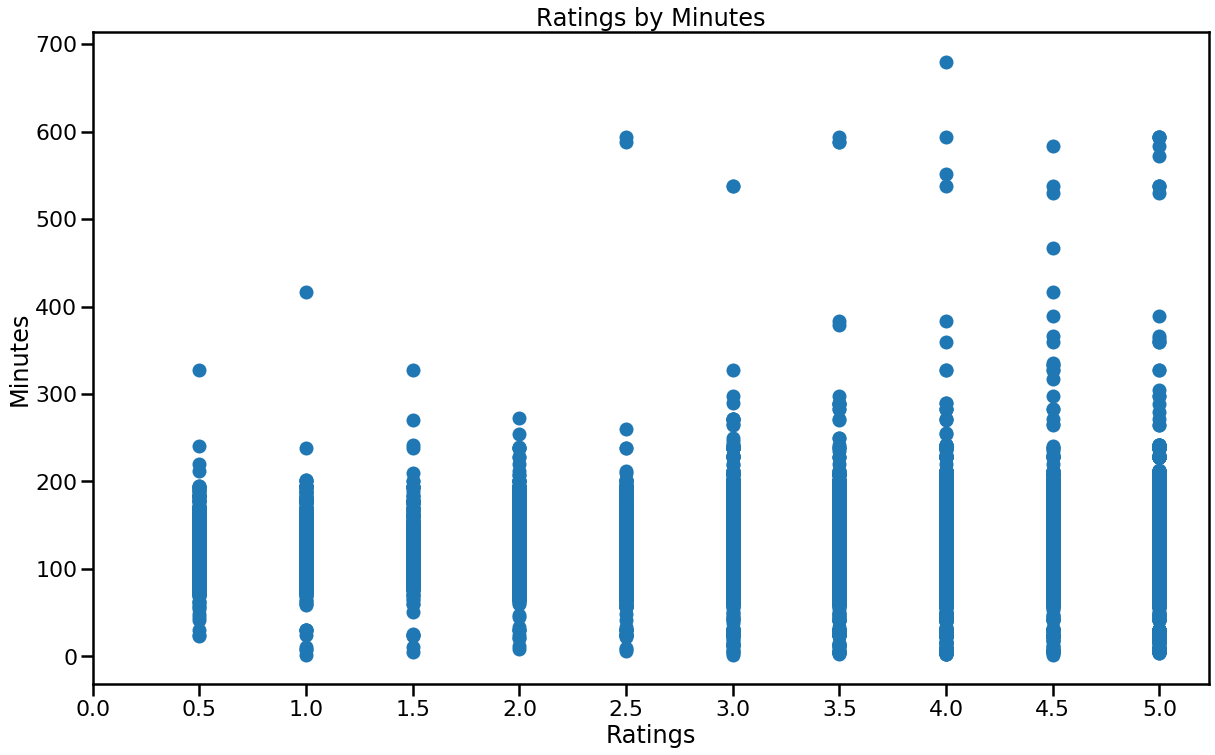

In [146]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
plt.scatter(x=eda_df["rating"], y=eda_df["runtimeMinutes"])
plt.xticks(np.arange(0, 5.5, step=0.5))
plt.xlabel("Ratings")
plt.ylabel("Minutes")
plt.title("Ratings by Minutes")
plt.show()

In [166]:
subdf_year = eda_df.groupby("startYear").nunique()["movieId"]

In [172]:
subdf_year

startYear
1902.0      1
1903.0      1
1908.0      1
1915.0      1
1916.0      4
         ... 
2014.0    291
2015.0    269
2016.0    214
2017.0    144
2018.0     40
Name: movieId, Length: 106, dtype: int64

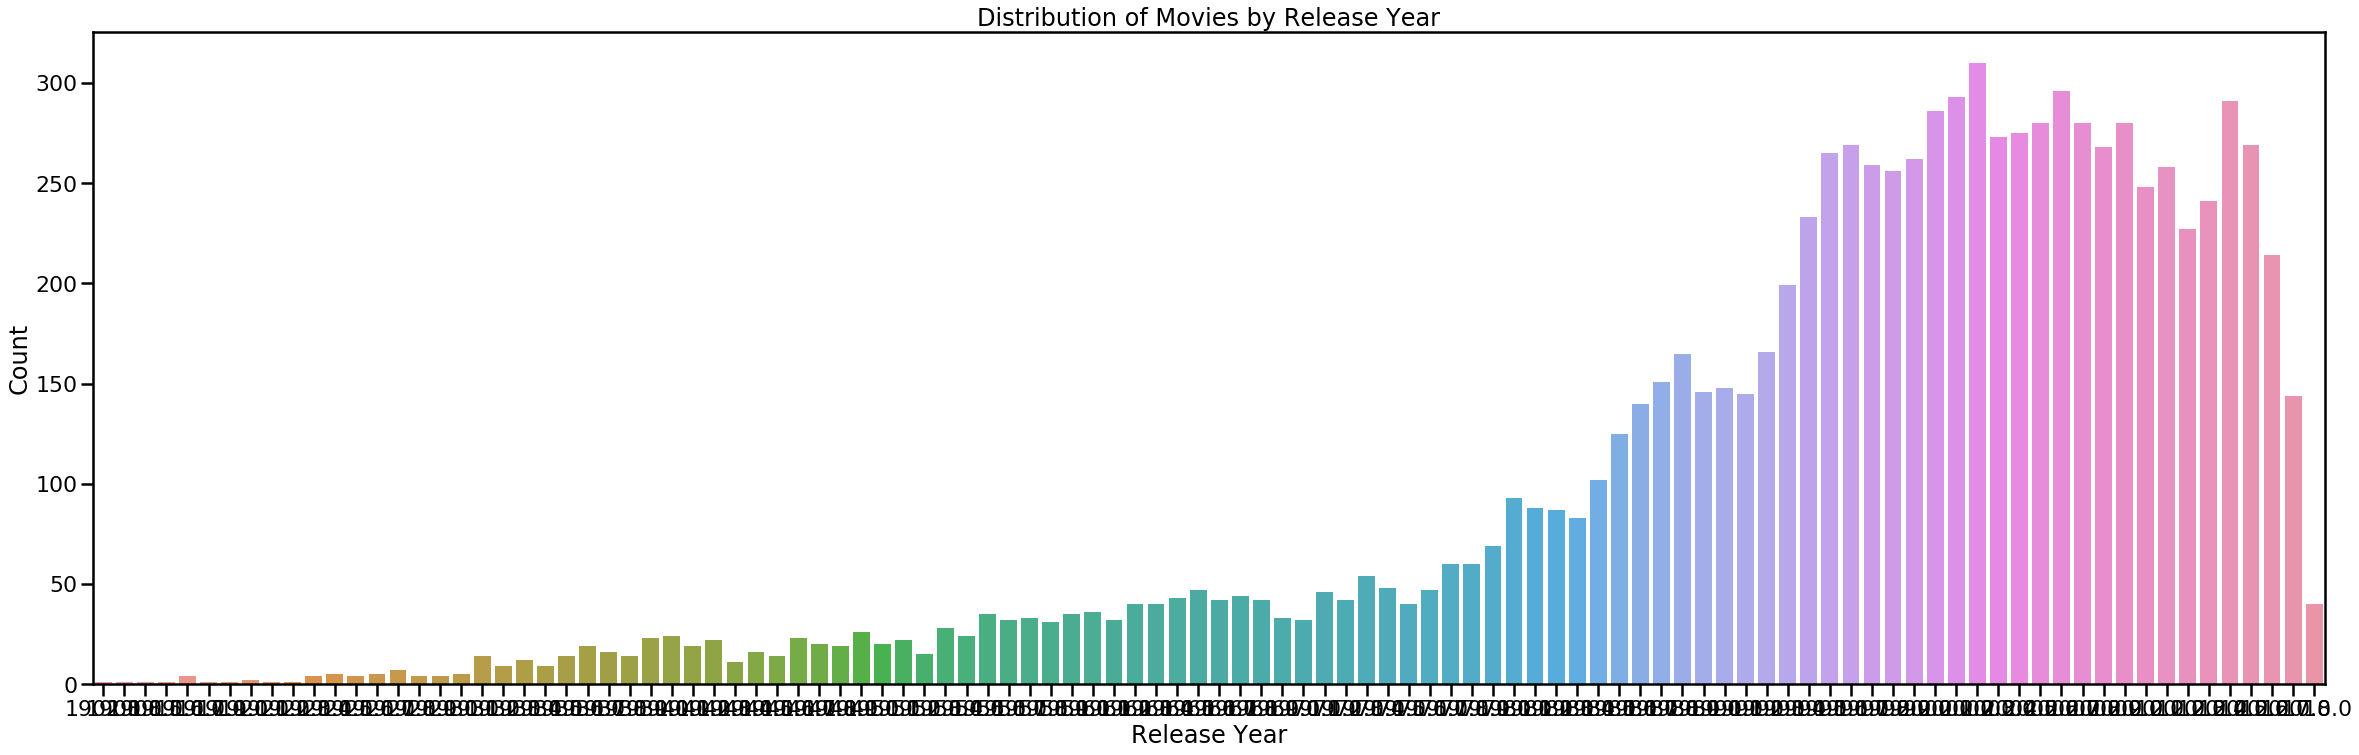

In [206]:
fig, ax = plt.subplots()
fig.set_size_inches(40, 12)
sns.barplot(x=subdf_year.index, y=subdf_year, ax=ax)
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Distribution of Movies by Release Year")
plt.show()

In [238]:
top_ten = list(pd.DataFrame(eda_df.groupby("movieId").mean()["rating"]).sort_values(by="rating", ascending=False)[:10].index)

In [252]:
low_count

,userId,rating,title,startYear,runtimeMinutes,directors,Thriller,Documentary,IMAX,Animation,...,(no genres listed),Children,Adventure,Western,Musical,Fantasy,Comedy,Drama,Horror,Action
movieId,,,,,,,,,,,,,,,,,,,,,
193609,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
57502,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
57499,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
57421,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
57326,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,278,278,278,278,278,278,278,278,278,278,...,278,278,278,278,278,278,278,278,278,278
593,279,279,279,279,279,279,279,279,279,279,...,279,279,279,279,279,279,279,279,279,279
296,307,307,307,307,307,307,307,307,307,307,...,307,307,307,307,307,307,307,307,307,307


In [255]:
low_count = eda_df.groupby("movieId").count().sort_values(by= "rating", ascending=True)
low_count

,userId,rating,title,startYear,runtimeMinutes,directors,Thriller,Documentary,IMAX,Animation,...,(no genres listed),Children,Adventure,Western,Musical,Fantasy,Comedy,Drama,Horror,Action
movieId,,,,,,,,,,,,,,,,,,,,,
193609,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
57502,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
57499,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
57421,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
57326,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,278,278,278,278,278,278,278,278,278,278,...,278,278,278,278,278,278,278,278,278,278
593,279,279,279,279,279,279,279,279,279,279,...,279,279,279,279,279,279,279,279,279,279
296,307,307,307,307,307,307,307,307,307,307,...,307,307,307,307,307,307,307,307,307,307


Potentially consider removing movies with low rating counts (over 6000 movies have less than 5 ratings)

### Data Preparation

In [258]:
preprocessed = condensed

In [259]:
preprocessed.drop(columns = "title", inplace=True)

In [260]:
directors = set()
for director_string in preprocessed['directors']:
   director_list = director_string.split(',')
   for director in director_list:
       directors.add(director)
directors = list(directors)

In [261]:
for d in directors:
    preprocessed[d]=preprocessed['directors'].apply(lambda x: 1 if g in x else 0)
    #Last line converts Trues to 1 and Falses to 0 for the directors.

In [263]:
preprocessed.drop(columns="directors", inplace=True)

In [266]:
preprocessed.head()

,userId,movieId,rating,startYear,runtimeMinutes,Thriller,Documentary,IMAX,Animation,Romance,...,nm0004217,nm0001501,nm0000682,nm0585011,nm0692872,nm0280814,nm0735872,nm3626583,nm0612322,nm0330619
0,1,1,4.0,1995.0,81.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,1995.0,101.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,6,4.0,1995.0,170.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,47,5.0,1995.0,127.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,50,5.0,1995.0,106.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [267]:
features = preprocessed.drop(columns = ["userId", "movieId", "rating"])

#### PCA

In [269]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [270]:
scaler = StandardScaler()
features_transformed = scaler.fit_transform(features)

In [293]:
pca = PCA(n_components=21)
principalComponents = pca.fit_transform(features_transformed)

In [295]:
pca.explained_variance_ratio_.sum()

0.9845486319215339

In [302]:
components_df = pd.DataFrame(principalComponents, columns = ["PC " + str(num) for num in range(1, 22)])

### Modeling

#### Baseline Model with Surprise

In [332]:
from surprise import Reader, Dataset
from surprise.prediction_algorithms import KNNBaseline, KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy

In [309]:
user_item = preprocessed[["userId", "movieId", "rating"]]

In [312]:
reader = Reader(rating_scale=(0.5, 5.5))
data = Dataset.load_from_df(user_item, reader)

Dataset has ratings from 610 viewers for 9703 movies total.

In [321]:
trainset, testset = train_test_split(data, test_size=0.2)

In [323]:
sim_cos = {'name':'cosine', 'user_based':True}

In [327]:
basic = KNNBasic(sim_options=sim_cos)
basic.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [331]:
base_test_preds = basic.test(testset)

In [333]:
accuracy.rmse(base_test_preds)

RMSE: 0.9690


0.9689782486826695

RMSE for baseline model is 0.97, meaning that on average the model's predictions for user ratings are 1 point off (on a scale of 0.5 - 5).

#### Modeling with LightFM

In [337]:
from lightfm.data import Dataset
from lightfm import LightFM

C:\Users\swzoe\anaconda3\envs\learn-env\lib\site-packages\lightfm\_lightfm_fast.py:10: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  "LightFM was compiled without OpenMP support. "


In [338]:
data_fm = Dataset()
data_fm.fit(user_item.userId.unique(), user_item.movieId.unique())

In [339]:
num_users, num_items = data_fm.interactions_shape()
print('Num users: {}, num_items {}.'.format(num_users, num_items))

Num users: 610, num_items 9703.


In [340]:
[tuple(i) for i in user_item.values]

[(1.0, 1.0, 4.0),
 (1.0, 3.0, 4.0),
 (1.0, 6.0, 4.0),
 (1.0, 47.0, 5.0),
 (1.0, 50.0, 5.0),
 (1.0, 70.0, 3.0),
 (1.0, 101.0, 5.0),
 (1.0, 110.0, 4.0),
 (1.0, 151.0, 5.0),
 (1.0, 157.0, 5.0),
 (1.0, 163.0, 5.0),
 (1.0, 216.0, 5.0),
 (1.0, 223.0, 3.0),
 (1.0, 231.0, 5.0),
 (1.0, 235.0, 4.0),
 (1.0, 260.0, 5.0),
 (1.0, 296.0, 3.0),
 (1.0, 316.0, 3.0),
 (1.0, 333.0, 5.0),
 (1.0, 349.0, 4.0),
 (1.0, 356.0, 4.0),
 (1.0, 362.0, 5.0),
 (1.0, 367.0, 4.0),
 (1.0, 423.0, 3.0),
 (1.0, 441.0, 4.0),
 (1.0, 457.0, 5.0),
 (1.0, 480.0, 4.0),
 (1.0, 500.0, 3.0),
 (1.0, 527.0, 5.0),
 (1.0, 543.0, 4.0),
 (1.0, 552.0, 4.0),
 (1.0, 553.0, 5.0),
 (1.0, 590.0, 4.0),
 (1.0, 592.0, 4.0),
 (1.0, 593.0, 4.0),
 (1.0, 596.0, 5.0),
 (1.0, 608.0, 5.0),
 (1.0, 648.0, 3.0),
 (1.0, 661.0, 5.0),
 (1.0, 673.0, 3.0),
 (1.0, 733.0, 4.0),
 (1.0, 736.0, 3.0),
 (1.0, 780.0, 3.0),
 (1.0, 804.0, 4.0),
 (1.0, 919.0, 5.0),
 (1.0, 923.0, 5.0),
 (1.0, 940.0, 5.0),
 (1.0, 943.0, 4.0),
 (1.0, 954.0, 5.0),
 (1.0, 1009.0, 3.0),
 (1.0, 1

In [342]:
interactions_matrix, weights_matrix = data_fm.build_interactions([tuple(i) for i in user_item.values])

print(repr(interactions_matrix))

<610x9703 sparse matrix of type '<class 'numpy.int32'>'
	with 100760 stored elements in COOrdinate format>


In [354]:
consolidated = pd.concat([user_item.reset_index(), components_df], axis=1)

In [363]:
movies_pc = consolidated.groupby("movieId").mean().drop(columns = ["index", "userId", "rating"], axis = 1).reset_index()

In [367]:
[(i[0], i[1:]) for i in movies_pc.values]

[(1.0,
  array([ 5.21416293,  1.75681107, -0.62085192,  1.1609337 , -0.70121928,
          0.36455741,  0.14144431, -0.02383269,  0.09938072, -0.93415401,
         -1.66753902, -1.18593214, -0.74660718, -0.21438442,  0.3728994 ,
         -0.70782905,  0.04817369,  0.42439948,  0.44366138, -0.21513854,
          0.53441122])),
 (2.0,
  array([ 2.70796342,  1.61806178,  0.24731294,  1.09224798, -0.11284656,
         -0.15711706, -0.03695165,  0.83413166,  0.03822683, -0.97628401,
         -1.80618784,  0.03165945, -1.08464158, -0.86028616,  0.09914962,
         -0.30772407, -0.37157346, -0.16150728,  0.51282593,  0.13418561,
         -1.21972173])),
 (3.0,
  array([ 1.00518014, -1.64800583,  0.05748348, -1.5430415 , -0.36198102,
          0.15920796, -1.04083652,  0.51132745, -0.09245755,  0.41046228,
          0.36251475,  0.24085305,  0.01585581,  0.82108913,  0.22170986,
         -0.38496764,  0.46514719,  0.18628512,  0.21515488,  0.09905046,
         -0.38285557])),
 (4.0,
  array([

In [368]:
item_features = data_fm.build_item_features([(i[0], i[1:]) for i in movies_pc.values])

print(repr(item_features))

ValueError: Feature 5.214162927302906 not in feature mapping. Call fit first.